In [ ]:
#yfinance is a popular Python library used for downloading historical market data from Yahoo Finance.
#It simplifies the process of accessing financial data for various securities, including stocks, commodities, cryptocurrencies, and more
!pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---- --------------------------------- 122.9/949.2 kB 3.6 MB/s eta 0:00:01
     --------------------------- ---------- 696.3/949.2 kB 8.8 MB/s eta 0:00:01
     ------------------------------------- 949.2/949.2 kB 10.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/123.4 kB ? eta -:--:--
   ---------------------------------------- 123.4/123.4 kB ? eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------ --------------------------

In [ ]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn import metrics
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
#The code fetches historical price data for Bitcoin, Ethereum, Tether, and Binance Coin for the past 5 years and keeps only the Close and Volume columns for each of these cryptocurrencies.
#This cleaned data can then be used for further analysis or machine learning tasks, such as predicting future prices.

btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)



In [7]:
#The parameters lsuffix and rsuffix in the join method are used to add suffixes to overlapping column names when joining two DataFrames
# This is necessary to avoid column name conflicts when the two DataFrames have columns with the same name.

p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [8]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2020-10-15 00:00:00+00:00,11495.349609,24487233058,377.441833,14964182545,1.000796,40681227712,31.295864,504135680
2020-10-16 00:00:00+00:00,11322.123047,25635480772,366.229004,14670784817,1.001047,42355198410,29.994900,546849696
2020-10-17 00:00:00+00:00,11358.101562,19130430174,368.855927,10951115359,1.000697,31063236700,30.248236,377026508
2020-10-18 00:00:00+00:00,11483.359375,18283314340,378.213684,11047103109,1.000784,29893695719,30.659523,440840685
2020-10-19 00:00:00+00:00,11742.037109,23860769928,379.935608,12811242092,1.000853,35567986142,29.925068,385913101


In [9]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2025-10-11 00:00:00+00:00,110807.882812,110236934340,3750.611572,62475475938,1.001073,253479630144,1137.199341,8101403820
2025-10-12 00:00:00+00:00,115169.765625,93710414091,4164.427734,61216174681,1.001257,217858899877,1303.117310,10201040572
2025-10-13 00:00:00+00:00,115271.078125,71582026739,4245.467773,50253782420,1.001014,193528248672,1293.473267,11820387271
2025-10-14 00:00:00+00:00,113118.664062,92212917403,4125.412109,67094148347,1.000547,221236832633,1211.051147,10106588255
2025-10-15 00:00:00+00:00,110326.664062,76457738240,3938.099854,51846737920,1.000637,177907351552,1166.483643,6535186432


In [10]:
data.shape

(1827, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-10-15 00:00:00+00:00 to 2025-10-15 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1827 non-null   float64
 1   Volume (BTC)   1827 non-null   int64  
 2   Close (ETH)    1827 non-null   float64
 3   Volume (ETH)   1827 non-null   int64  
 4   Close (USDT)   1827 non-null   float64
 5   Volume (USDT)  1827 non-null   int64  
 6   Close (BNB)    1827 non-null   float64
 7   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [12]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [13]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,51107.555846,3.617503e+10,2417.318023,1.893853e+10,1.000174,6.861335e+10,418.370722,1.742272e+09
std,28936.638865,2.208568e+10,980.018602,1.254064e+10,0.000717,4.357409e+10,211.522228,1.468866e+09
min,11322.123047,5.331173e+09,366.229004,2.081626e+09,0.995872,9.989859e+09,26.857050,2.038465e+08
25%,27676.524414,2.137903e+10,1675.480713,1.025234e+10,0.999923,3.952366e+10,271.828735,7.528002e+08
50%,43113.878906,3.138049e+10,2316.059570,1.603898e+10,1.000157,5.837013e+10,367.655792,1.521388e+09
75%,65364.816406,4.530047e+10,3164.135132,2.354202e+10,1.000421,8.432729e+10,585.879242,2.115041e+09
max,124752.531250,3.509679e+11,4831.348633,9.773662e+10,1.011530,3.443980e+11,1310.214355,1.798295e+10


#Exploratory Data Analysis

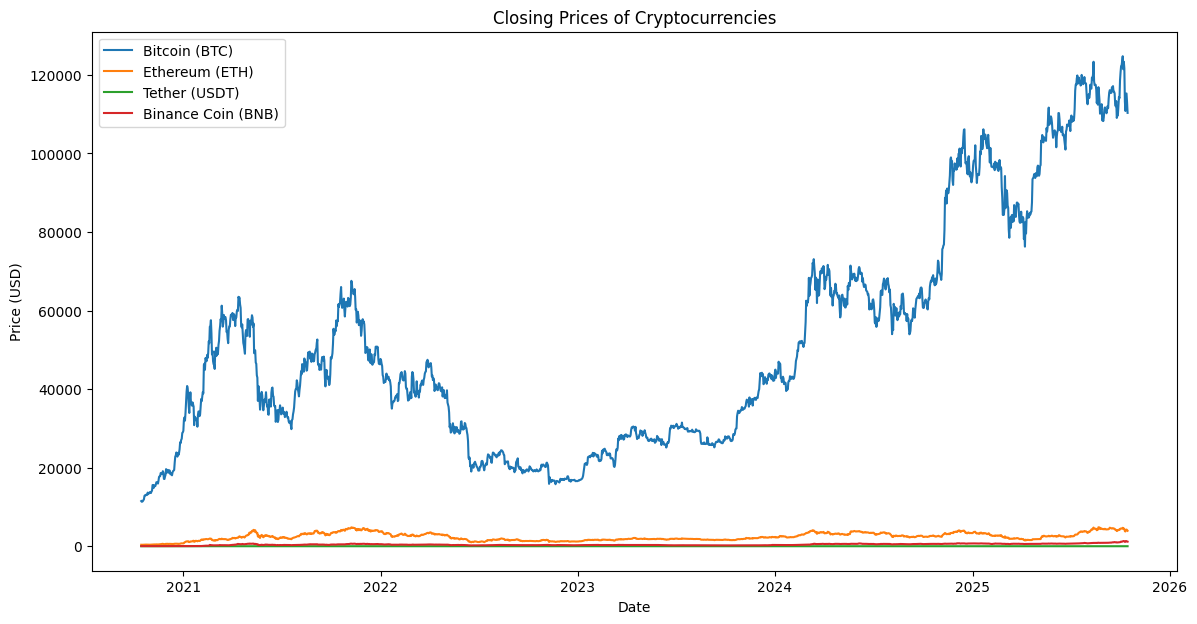

In [14]:
#Visualize the Closing Prices
# create a line plot to visualize the closing prices of all four cryptocurrencies over time:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

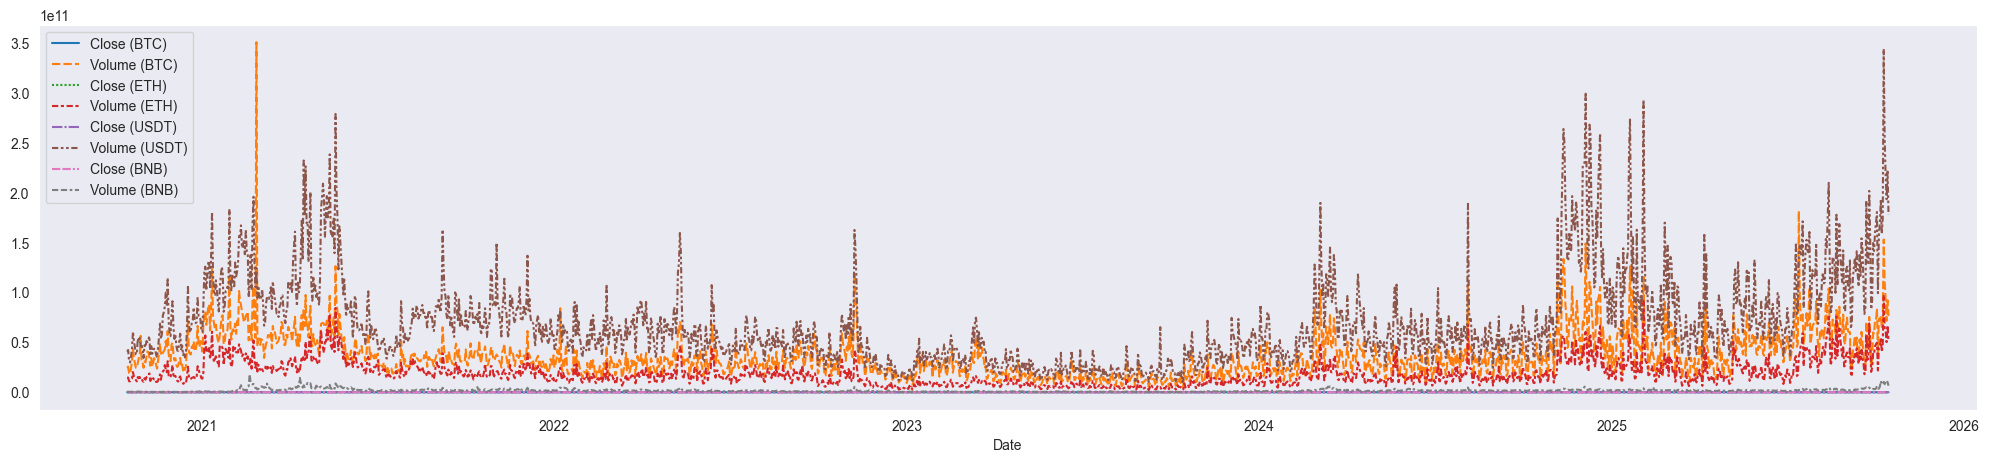

In [15]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

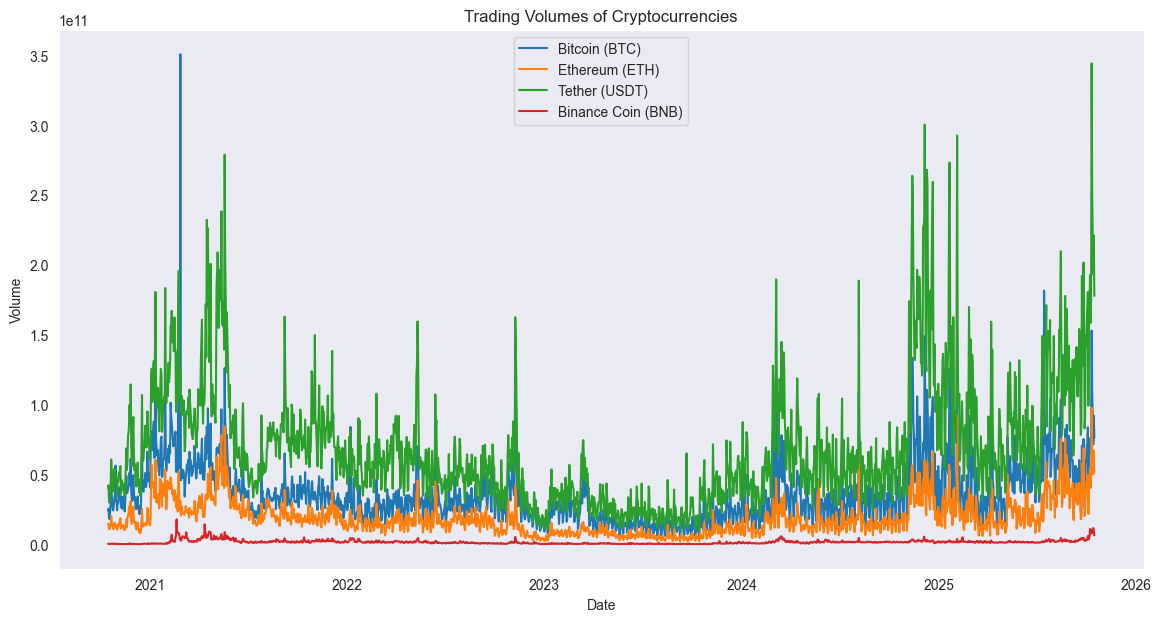

In [16]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

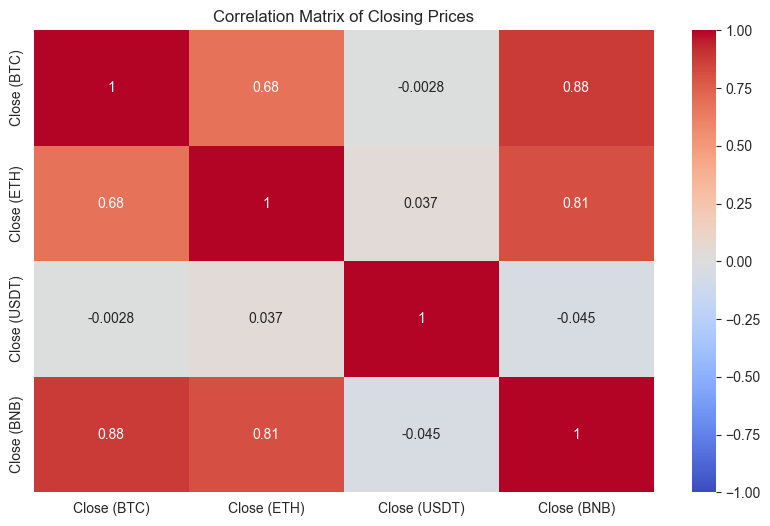

In [17]:
#Correlation Analysis
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


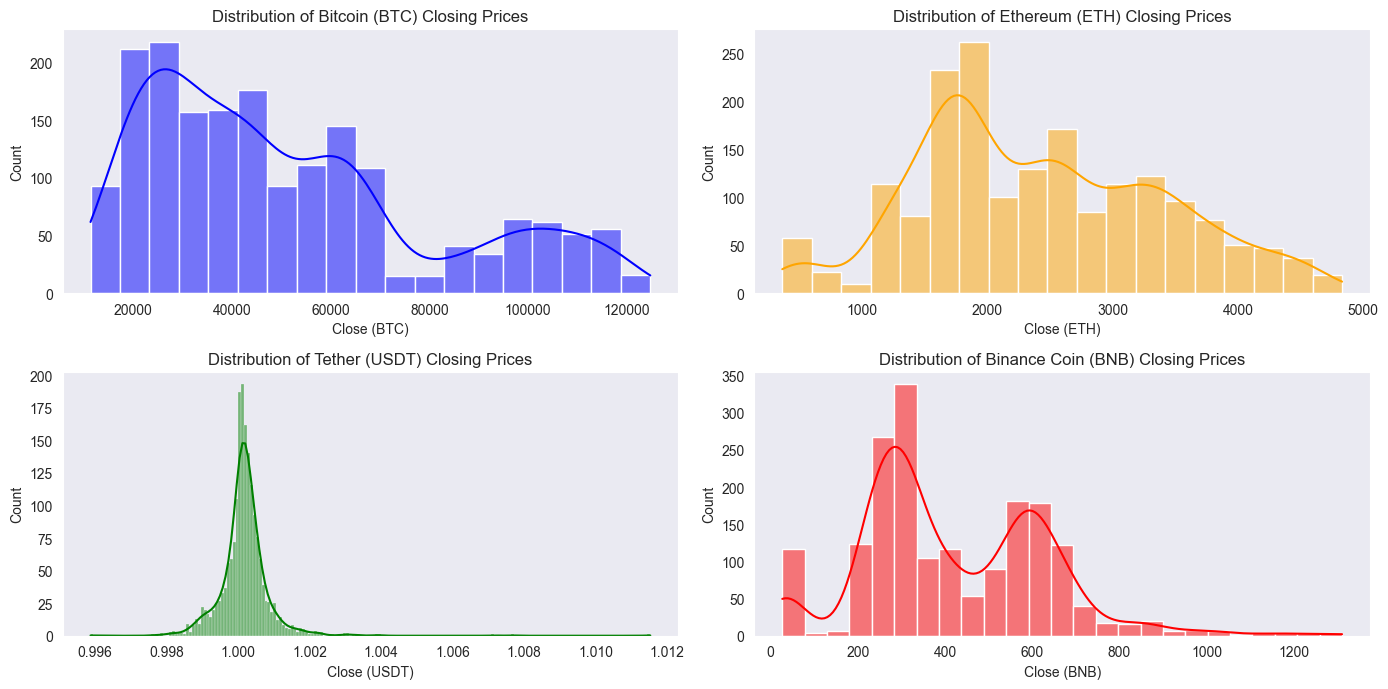

In [18]:
# Distribution of Closing Prices
#Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

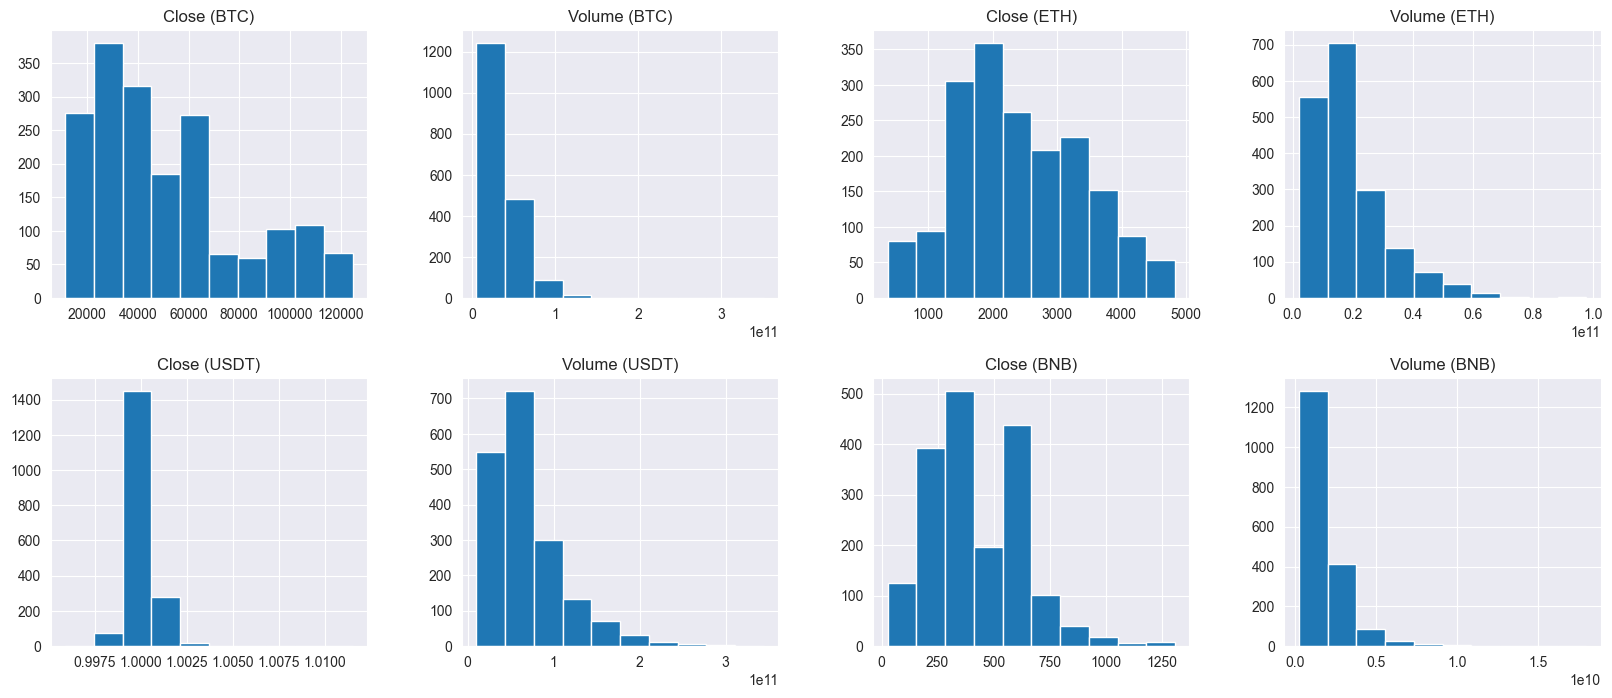

In [19]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

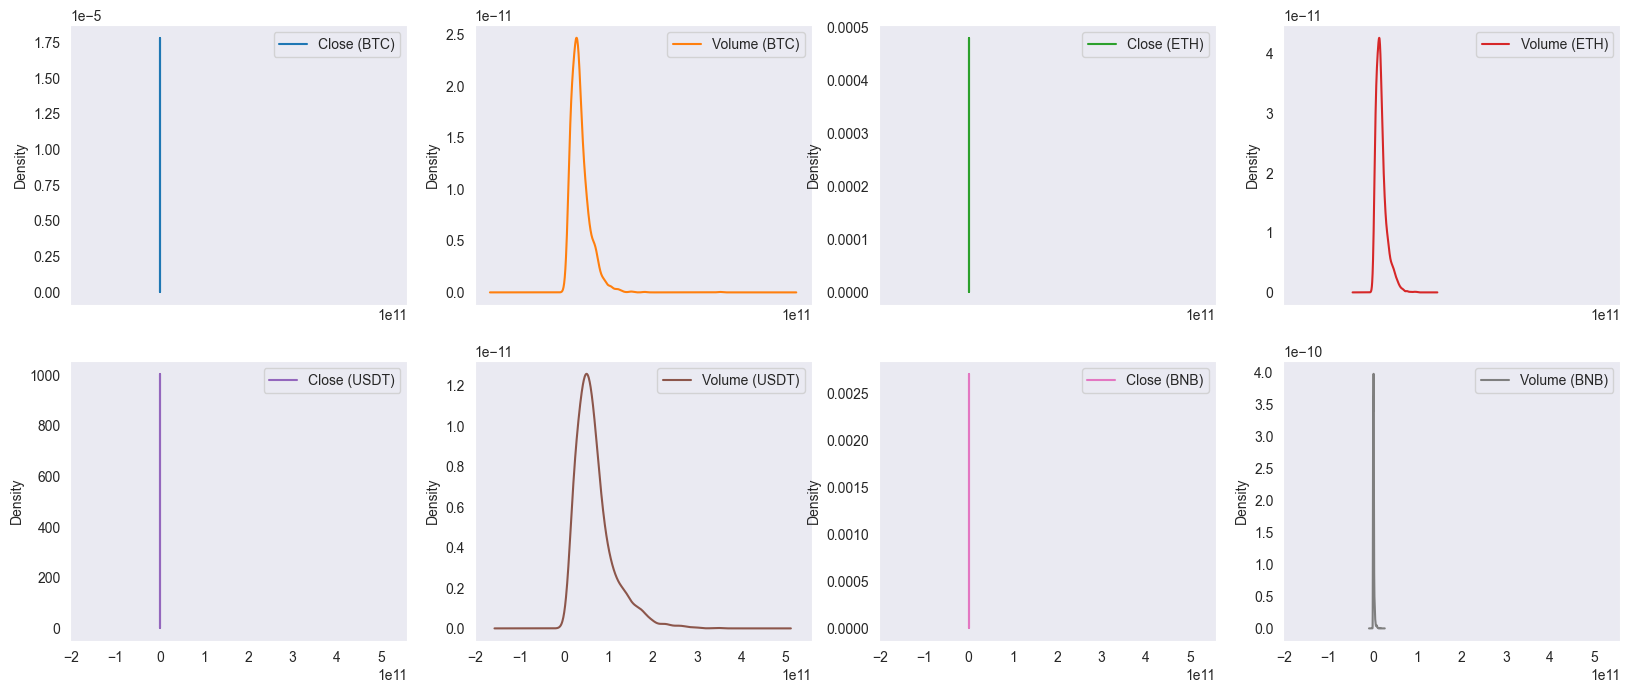

In [20]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

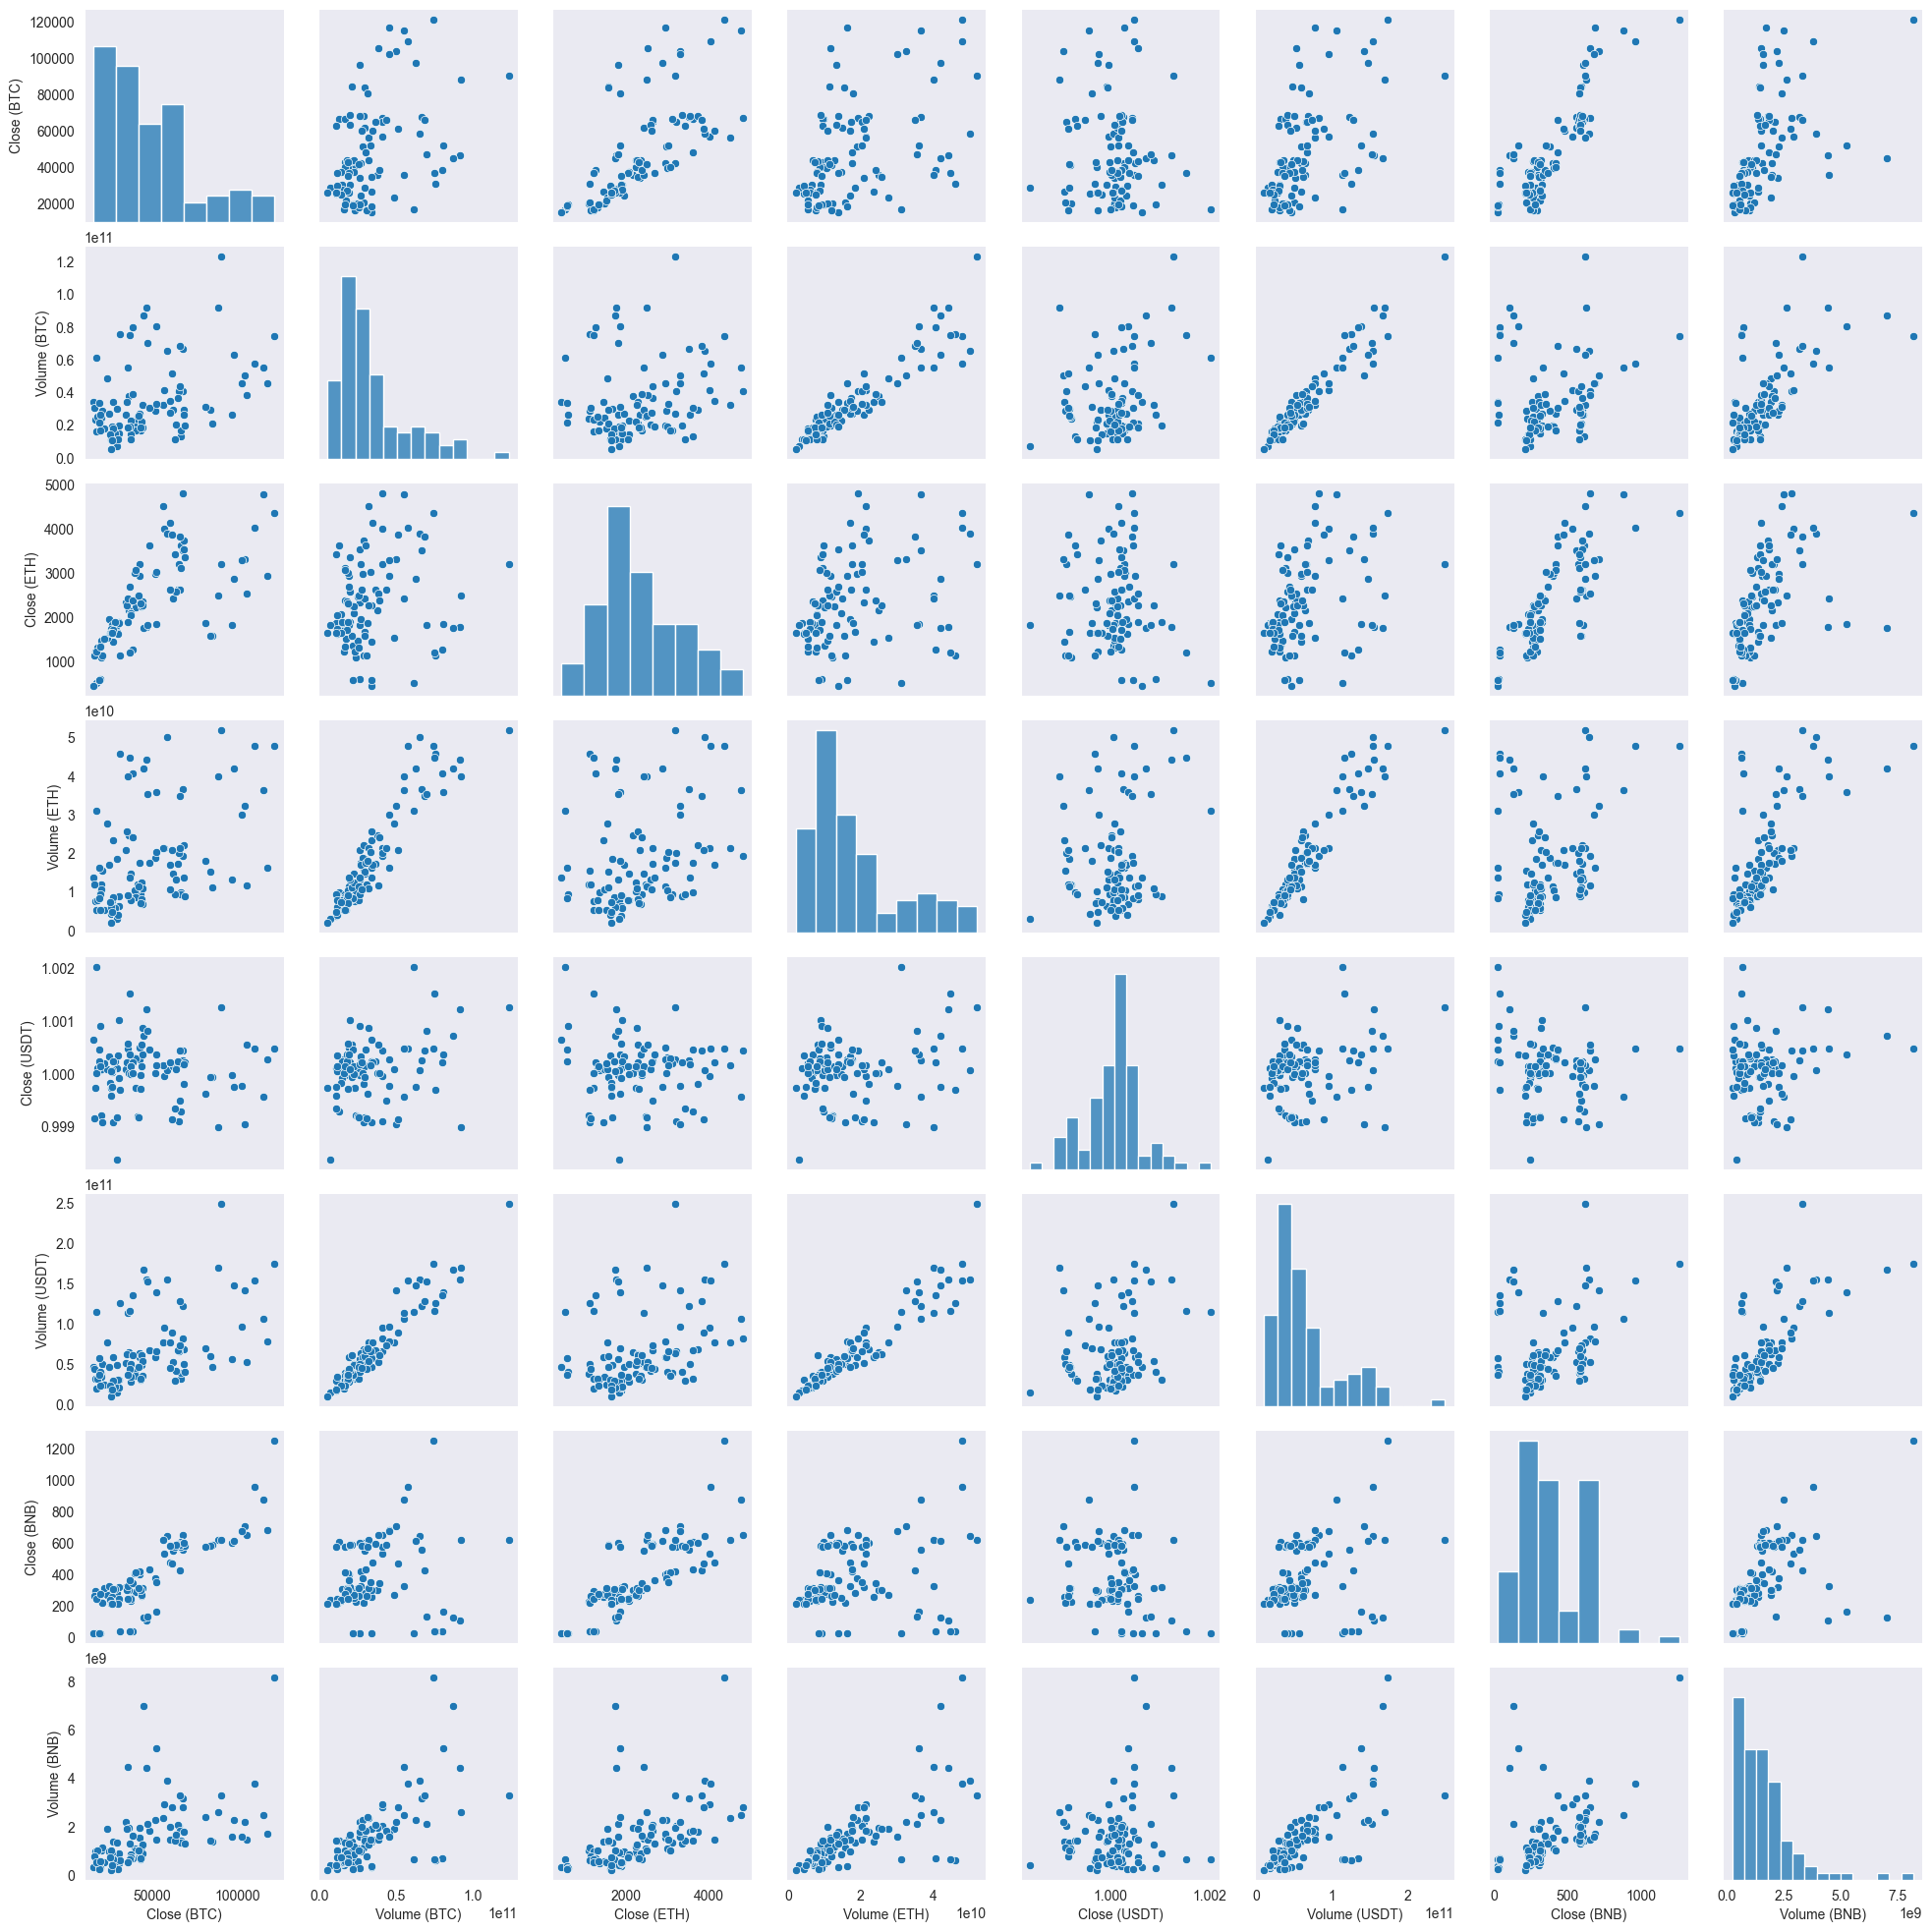

In [21]:
sns.pairplot(data.sample(n=100));

#Data Pre-processing

In [22]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [23]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2020-10-15 00:00:00+00:00,24487233058,377.441833,14964182545,1.000796,40681227712,31.295864,504135680
2020-10-16 00:00:00+00:00,25635480772,366.229004,14670784817,1.001047,42355198410,29.994900,546849696
2020-10-17 00:00:00+00:00,19130430174,368.855927,10951115359,1.000697,31063236700,30.248236,377026508
2020-10-18 00:00:00+00:00,18283314340,378.213684,11047103109,1.000784,29893695719,30.659523,440840685
2020-10-19 00:00:00+00:00,23860769928,379.935608,12811242092,1.000853,35567986142,29.925068,385913101


In [24]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2025-10-11 00:00:00+00:00,110236934340,3750.611572,62475475938,1.001073,253479630144,1137.199341,8101403820
2025-10-12 00:00:00+00:00,93710414091,4164.427734,61216174681,1.001257,217858899877,1303.117310,10201040572
2025-10-13 00:00:00+00:00,71582026739,4245.467773,50253782420,1.001014,193528248672,1293.473267,11820387271
2025-10-14 00:00:00+00:00,92212917403,4125.412109,67094148347,1.000547,221236832633,1211.051147,10106588255
2025-10-15 00:00:00+00:00,76457738240,3938.099854,51846737920,1.000637,177907351552,1166.483643,6535186432


In [25]:
Y.head()

Date
2020-10-15 00:00:00+00:00    11495.349609
2020-10-16 00:00:00+00:00    11322.123047
2020-10-17 00:00:00+00:00    11358.101562
2020-10-18 00:00:00+00:00    11483.359375
2020-10-19 00:00:00+00:00    11742.037109
Name: Close (BTC), dtype: float64

In [26]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [27]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1461, 7)
X_test shape: (366, 7)
y_train shape: (1461,)
y_test shape: (366,)


In [28]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

c:\Users\Sanket kshirsagar\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [29]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features) 

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [30]:
X_train

array([[1.00027096e+00, 4.09639058e+10, 3.16328186e+02, 1.61446981e+09],
       [1.00006294e+00, 7.60816896e+10, 3.25784027e+02, 3.24631497e+09],
       [9.99095023e-01, 4.61300257e+10, 2.14261917e+02, 1.05098409e+09],
       ...,
       [1.00060201e+00, 8.27485427e+10, 6.00181030e+02, 1.73539807e+09],
       [1.00015295e+00, 6.10433273e+10, 3.91445831e+02, 1.51258737e+09],
       [1.00008094e+00, 5.01700842e+10, 2.81425354e+02, 9.79620743e+08]])

In [31]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:

#Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 149472546.67335105
R-squared: 0.8255088379094894

----- Ridge Regression -----
Mean Squared Error (MSE): 154103014.81291333
R-squared: 0.8201033250934067

----- Lasso Regression -----
Mean Squared Error (MSE): 149579531.05738533
R-squared: 0.8253839465504328

----- ElasticNet Regression -----
Mean Squared Error (MSE): 772708688.5926254
R-squared: 0.09795584519869383

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 895658687.8825371
R-squared: -0.04557344317295531

----- Decision Tree Regression -----
Mean Squared Error (MSE): 95196466.10011904
R-squared: 0.8888696127388509

----- Random Forest Regression -----
Mean Squared Error (MSE): 50779947.29987523
R-squared: 0.9407205389052902

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 52449068.037928954
R-squared: 0.9387720418485775

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 55628952.10953555
R-squared: 0.935059910896

c:\Users\Sanket kshirsagar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


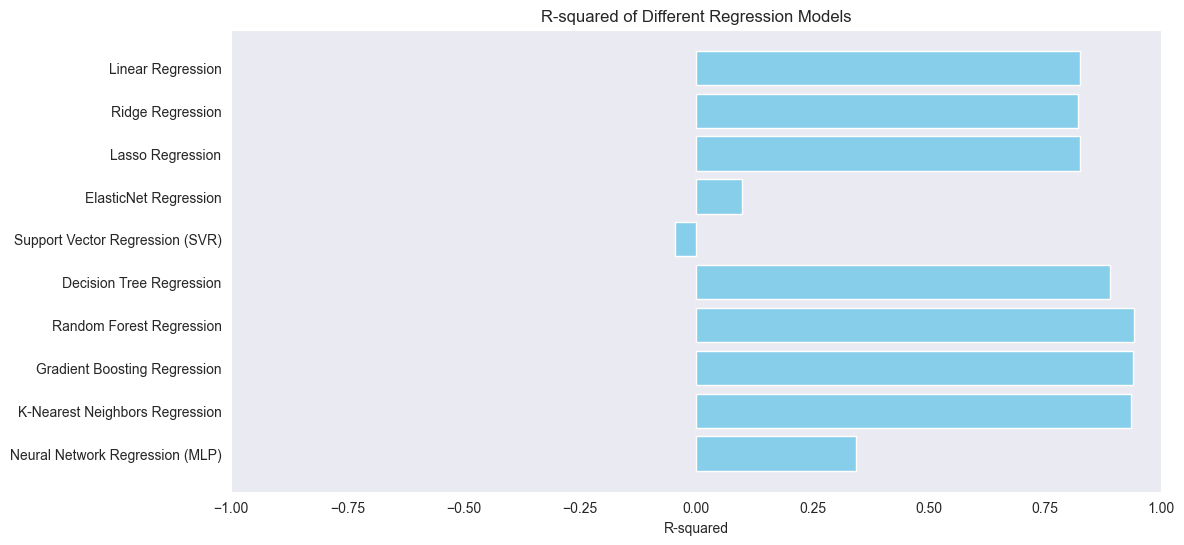

In [33]:
#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()


#Random Forest Regression is a powerful and versatile algorithm suitable for various regression tasks, offering robust performance and the ability to handle complex data relationships

#Saving the Model

In [34]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train, Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Squared Error (MSE): 51494520.628363386
Loaded Random Forest Regression - R-squared: 0.9398863607684897
